In [11]:
import time
import sys


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import mixture
from sklearn import metrics
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pyclustering.utils.metric import type_metric
from pyclustering.utils.metric import  distance_metric
from pyclustering.cluster.kmedoids import kmedoids

In [3]:
import sys
sys.path.append("../")

In [4]:
from helpers import read_configuration_file
from helpers import set_up_logger
from helpers import timefn
from helpers import INFO
from cluster import Cluster
from region import Region

In [1]:
def load_region_mean(filename):

    with open(filename) as file:
        context = file.read()
        size = len(context)
        arraystr= context[1:size-1]
        arraystr = arraystr.split(',')
        region_means = [float(item) for item in arraystr]
        return region_means


In [19]:
sns.set(color_codes=True)
wga_region_file = "/home/a/ag568/wga_windows_mean_0_MANHATAN_5_MEAN_RATIO.txt"
no_wga_region_file = "/home/a/ag568/no_wga_windows_mean_0_MANHATAN_5_MEAN_RATIO.txt"

wga_region_mean = np.array(load_region_mean(filename=wga_region_file))

print("{0} Size of WGA sample {1}".format(INFO, len(wga_region_mean)))
print("{0} WGA max: {1}".format(INFO, max(wga_region_mean)))
print("{0} WGA min: {1}".format(INFO, min(wga_region_mean)))
print("{0} WGA mean: {1}".format(INFO, np.mean(wga_region_mean)))
print("{0} WGA var: {1}".format(INFO, np.var(wga_region_mean)))

no_wga_region_mean = np.array(load_region_mean(filename=no_wga_region_file))

print("{0} NO-WGA size {1}".format(INFO, len(no_wga_region_mean)))
print("{0} NO-WGA max: {1}".format(INFO, max(no_wga_region_mean)))
print("{0} NO-WGA min: {1}".format(INFO, min(no_wga_region_mean)))
print("{0} NO-WGA mean: {1}".format(INFO, np.mean(no_wga_region_mean)))
print("{0} NO-WGA var: {1}".format(INFO, np.var(no_wga_region_mean)))

INFO: Size of WGA sample 178714
INFO: WGA max: 40.93
INFO: WGA min: 0.0
INFO: WGA mean: 17.15817893393914
INFO: WGA var: 80.35043029440362
INFO: NO-WGA size 178714
INFO: NO-WGA max: 28.96
INFO: NO-WGA min: 0.0
INFO: NO-WGA mean: 16.07740361695222
INFO: NO-WGA var: 19.467089320099724


In [7]:
def make_data_array(wga_region_mean, no_wga_region_mean):
    data = []
    for wga, no_wga in zip(wga_region_mean, no_wga_region_mean):
        data.append([wga, no_wga, (wga + 1)/(no_wga + 1)])
    return data

In [9]:
data = make_data_array(wga_region_mean=wga_region_mean,
                         no_wga_region_mean=no_wga_region_mean)

data = np.array(data)

print("Shape of data: ",data.shape)

Shape of data:  (178714, 3)


## KMeans Clustering

Number of clusters  2
Calinski score:  213235.76520859913
Davies score:  0.814837404239089


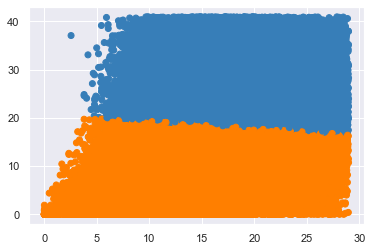

Number of clusters  3
Calinski score:  198171.729435891
Davies score:  0.9017202882503211


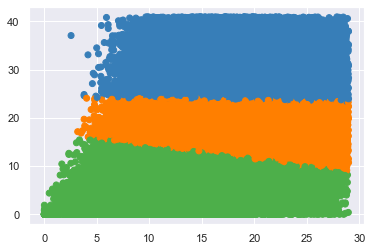

Number of clusters  4
Calinski score:  175749.34544674514
Davies score:  1.0110015712728333


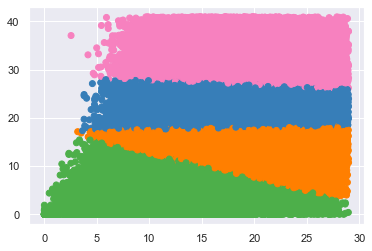

Number of clusters  5
Calinski score:  173169.11039257684
Davies score:  0.9155220046972665


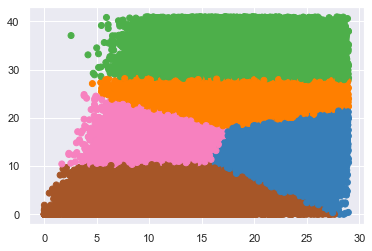

In [17]:
N_CLUSTERS = [2, 3, 4, 5]
for nclusters in N_CLUSTERS:
    
    print("Number of clusters ", nclusters)
    kmeans = KMeans(n_clusters=nclusters)
    kmeans.fit(X=data)
    labels = kmeans.labels_

    
    calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)
    print("Calinski score: ", calinski_harabasz_score)
    davies_bouldin_score = metrics.davies_bouldin_score(data, labels)
    print("Davies score: ", davies_bouldin_score)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                      int(max(labels) + 1))))


    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    
    plt.scatter(no_wga_region_mean, wga_region_mean,  color=colors[labels])
    plt.show()


## GMM Clustering


Number of clusters  2


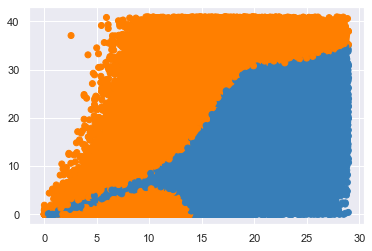

Number of clusters  3


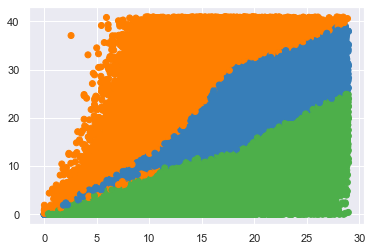

Number of clusters  4


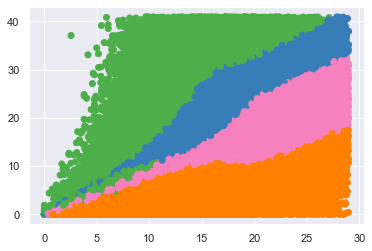

Number of clusters  5


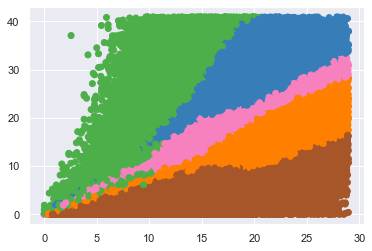

In [27]:
for nclusters in N_CLUSTERS:
    
    print("Number of clusters ", nclusters)
    gmm = mixture.GaussianMixture(n_components=nclusters,
                                covariance_type='full')
    gmm.fit(data)
    labels = gmm.predict(data)
    
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                      int(max(labels) + 1))))


    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    
    plt.scatter(no_wga_region_mean, wga_region_mean,  color=colors[labels])
    plt.show()

## KMedoids

In [21]:
region = Region.load(filename="/home/a/ag568/region_0_MANHATAN_5_MEAN_RATIO.txt")

INFO: Loading region from file: /home/a/ag568/region_0_MANHATAN_5_MEAN_RATIO.txt


In [23]:
clusters_files = ["/home/a/ag568/cluster_0_MANHATAN_5_MEAN_RATIO.txt",
                  "/home/a/ag568/cluster_1_MANHATAN_5_MEAN_RATIO.txt",
                  "/home/a/ag568/cluster_2_MANHATAN_5_MEAN_RATIO.txt",
                  "/home/a/ag568/cluster_3_MANHATAN_5_MEAN_RATIO.txt",
                  "/home/a/ag568/cluster_4_MANHATAN_5_MEAN_RATIO.txt"]
clusters=[]

for file in clusters_files:
    cluster = Cluster.load(filename=file)
    clusters.append(cluster)

INFO: Loading cluster from file: /home/a/ag568/cluster_0_MANHATAN_5_MEAN_RATIO.txt
INFO: Loading cluster from file: /home/a/ag568/cluster_1_MANHATAN_5_MEAN_RATIO.txt
INFO: Loading cluster from file: /home/a/ag568/cluster_2_MANHATAN_5_MEAN_RATIO.txt
INFO: Loading cluster from file: /home/a/ag568/cluster_3_MANHATAN_5_MEAN_RATIO.txt
INFO: Loading cluster from file: /home/a/ag568/cluster_4_MANHATAN_5_MEAN_RATIO.txt


In [28]:
# align the window means with the indexes
labels=[]
for i in range(len(wga_region_mean)):
    
    found = False
    for cluster in clusters:
        cindexes = cluster.indexes
            
        if i in cindexes:
                labels.append(cluster.cidx)
                found = True
                break
    
    if found == False:
        print("For window {0} no cluster was found".format(i))
  

assert len(labels) == len(wga_region_mean)

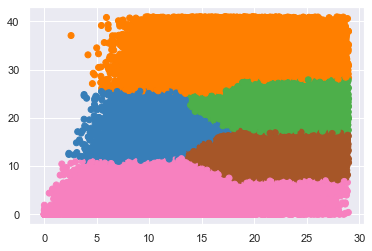

In [29]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                      int(max(labels) + 1))))


# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
    
plt.scatter(no_wga_region_mean, wga_region_mean, color=colors[labels])
plt.show()